In [1]:
import pandas as pd
import numpy as np

In [2]:
# fwf = fixed width data 

data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

In [3]:
data.head()

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577


In [4]:
data.columns = ['month', 'value']
data.index = data.month
data = data.drop('month', 1)

In [5]:
data.head()

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [6]:
# What do you notice about the range of dates?

# The data is indexed to the dates rather than with an independent column for row numbers 

print(data['1950':'1952'].head())
print(data['1950':'1952'].head())

               value
month               
1950-01-01 -0.060310
1950-02-01  0.626810
1950-03-01 -0.008128
1950-04-01  0.555100
1950-05-01  0.071577
               value
month               
1950-01-01 -0.060310
1950-02-01  0.626810
1950-03-01 -0.008128
1950-04-01  0.555100
1950-05-01  0.071577


In [7]:
# What is the empirical range of dates?

# 01-1950 to 10-2017

print(data.head())
print(data.tail())

               value
month               
1950-01-01 -0.060310
1950-02-01  0.626810
1950-03-01 -0.008128
1950-04-01  0.555100
1950-05-01  0.071577
              value
month              
2017-06-01  0.40166
2017-07-01  0.63423
2017-08-01  0.15004
2017-09-01 -0.49245
2017-10-01  0.69034


In [8]:
# Convert data to monthly view / period index
data_pd = data.to_period()
data_pd.head()

,value
month,
1950-01,-0.060310
1950-02,0.626810
1950-03,-0.008128
1950-04,0.555100
1950-05,0.071577


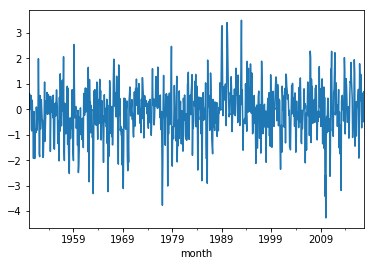

In [9]:
# How to visualize?

import matplotlib.pyplot as plt

data_pd.value.plot()
plt.show()

In [10]:
# What kind of index do we have?
type(data_pd.index)

pandas.core.indexes.period.PeriodIndex

In [11]:
data_pd['1951-11-11':'1951-11-12']

,value
month,
1951-11,-0.068519


In [12]:
data_pd['1951-11-11':'1952-01-12']

,value
month,
1951-11,-0.068519
1951-12,1.987200
1952-01,0.368250


In [13]:
# Which is more appropriate for this data?

In [14]:
# How do various data loads perform?
import timeit

print("infer_datetime_format = True, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

print("infer_datetime_format = False, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, header = None,)

print("infer_datetime_format = True, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, date_parser = dateparse,  header = None,)

print("infer_datetime_format = False, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, date_parser = dateparse,  header = None,)

infer_datetime_format = True, no date parser
1 loop, best of 3: 245 ms per loop
infer_datetime_format = False, no date parser
1 loop, best of 3: 247 ms per loop
infer_datetime_format = True, date parser provided
1 loop, best of 3: 259 ms per loop
infer_datetime_format = False, date parser provided
1 loop, best of 3: 260 ms per loop


In [15]:
# What if you already have the data frame and want to parse columns?
# Use to_datetime to convert to datetime format 
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

,day,hour,month,year
0,4,2,2,2015
1,5,3,3,2016


In [16]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [17]:
pd.to_datetime(df[['year', 'month', 'day']])

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [18]:
df

,day,hour,month,year
0,4,2,2,2015
1,5,3,3,2016


In [19]:
# Does it work with other column names? 
# Yes, it does; adding "hour" returns more specific data

pd.to_datetime(df[['month', 'day', 'year', 'hour']])

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [20]:
# Go get your own time series data, load it in, and see what you can see
# Hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [21]:
air_passengers = pd.read_csv("./data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0)
air_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


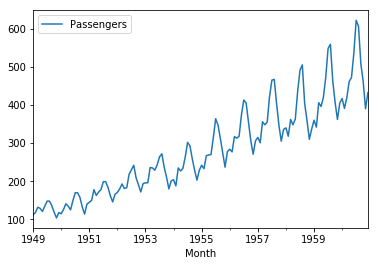

In [22]:
air_passengers.plot.line()
plt.show()

In [23]:
print(air_passengers.index.min())
print(air_passengers.index.max())

1949-01-01 00:00:00
1960-12-01 00:00:00


In [24]:
air_passengers_pd = air_passengers.to_period()
air_passengers_pd.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [25]:
# Let's experiment with truncate convenience function
ts = pd.Series(range(10), index = pd.date_range('7/31/2015', freq = 'M', periods = 10))
ts.truncate(before='10/31/2015', after='12/31/2015')

2015-10-31    3
2015-11-30    4
2015-12-31    5
Freq: M, dtype: int64

In [26]:
# You can truncate in a way that breaks frequency
ts[[0, 2, 6]].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2016-01-31'], dtype='datetime64[ns]', freq=None)

In [27]:
# It will save you when it can
ts.iloc[0:10:2].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2015-11-30', '2016-01-31',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='2M')